## Championship top 3 strikers

First we need to gather all of the data we want to plot for the strikers, but this exists on various pages of FBREF so we need to web scrape and combine.

In [33]:
import pandas as pd
import requests
import warnings
warnings.filterwarnings("ignore")

# Goal related stats

url= 'https://fbref.com/en/comps/10/shooting/Championship-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

goals = df[['Player', 'xG', 'SoT/90', 'PK', 'Gls']]

goals['xG'] = pd.to_numeric(goals['xG'], errors='coerce')
goals['SoT/90'] = pd.to_numeric(goals['SoT/90'], errors='coerce')
goals['PK'] = pd.to_numeric(goals['PK'], errors='coerce')
goals['Gls'] = pd.to_numeric(goals['Gls'], errors='coerce')
goals = goals[goals['Player'] != "Player"]


# misc stats

url= 'https://fbref.com/en/comps/10/misc/Championship-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

misc = df[['Player', 'Won%']]

misc['Ariel Won %'] = pd.to_numeric(misc['Won%'], errors='coerce')
misc = misc[misc['Player'] != "Player"]


# GCA stats

url= 'https://fbref.com/en/comps/10/gca/Championship-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)
gca = df[['Player', 'GCA90', 'SCA90']]

gca['GCA90'] = pd.to_numeric(gca['GCA90'], errors='coerce')
gca['SCA90'] = pd.to_numeric(gca['SCA90'], errors='coerce')
gca = gca[gca['Player'] != "Player"]


# possession stats

url= 'https://fbref.com/en/comps/10/possession/Championship-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)
possession = df[['Player', 'Att Pen', 'Succ%']]

possession['Pen Area Touches'] = pd.to_numeric(possession['Att Pen'], errors='coerce')
possession['Succ. Take On %'] = pd.to_numeric(possession['Succ%'], errors='coerce')
possession = possession[possession['Player'] != "Player"]

We then merge all the data together

In [34]:
df_merged = pd.concat([goals, misc, gca, possession], axis=1)
df_merged = df_merged[['Player', 'xG', 'SoT/90', 'PK', 'Gls', 'Ariel Won %', 'GCA90', 'SCA90', 'Pen Area Touches', 'Succ. Take On %']]

top_scorers = df_merged.nlargest(3, 'Gls')
top_scorers_goals = top_scorers.reset_index(drop=True)

top_scorers_goals = top_scorers.loc[:,~top_scorers.columns.duplicated()].copy()
top_scorers_goals

,Player,xG,SoT/90,PK,Gls,Ariel Won %,GCA90,SCA90,Pen Area Touches,Succ. Take On %
647,Sammie Szmodics,18.1,1.31,0.0,23.0,36.8,0.35,2.76,184.0,47.1
28,Adam Armstrong,19.6,1.34,4.0,20.0,57.9,0.46,2.71,245.0,25.9
714,Morgan Whittaker,9.9,1.47,0.0,19.0,23.7,0.42,3.67,123.0,34.8


Now we can plot our radar

In [35]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

# parameter names of the statistics we want to show
params = ["xG", "Shots on Target/90", "Penalties Scored", "Ariels Won %", "Goal Creating Actions/90", "Shot Creating Actions/90", "Penalty Area Touches", "Succ. Take On %"]

# The lower and upper boundaries for the statistics
low =  [0, 1.2, 0, 20, 0.2, 2.5, 100, 20]
high = [20, 1.5, 5, 60, 0.5, 4, 250, 50]

radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False, False, True, False, False, False, True, False],
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)


URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

Select the data we want (needs to be a list of the values)

In [36]:
szmodics = top_scorers_goals.loc[647]
armstrong = top_scorers_goals.loc[28]
whittaker = top_scorers_goals.loc[714]

szmodics = [szmodics['xG'], szmodics['SoT/90'], szmodics['PK'], szmodics['Ariel Won %'], szmodics['GCA90'], szmodics['SCA90'], szmodics['Pen Area Touches'], szmodics['Succ. Take On %']]
armstrong = [armstrong['xG'], armstrong['SoT/90'], armstrong['PK'], armstrong['Ariel Won %'], armstrong['GCA90'], armstrong['SCA90'], armstrong['Pen Area Touches'], armstrong['Succ. Take On %']]
whittaker = [whittaker['xG'], whittaker['SoT/90'], whittaker['PK'], whittaker['Ariel Won %'], whittaker['GCA90'], whittaker['SCA90'], whittaker['Pen Area Touches'], whittaker['Succ. Take On %']]


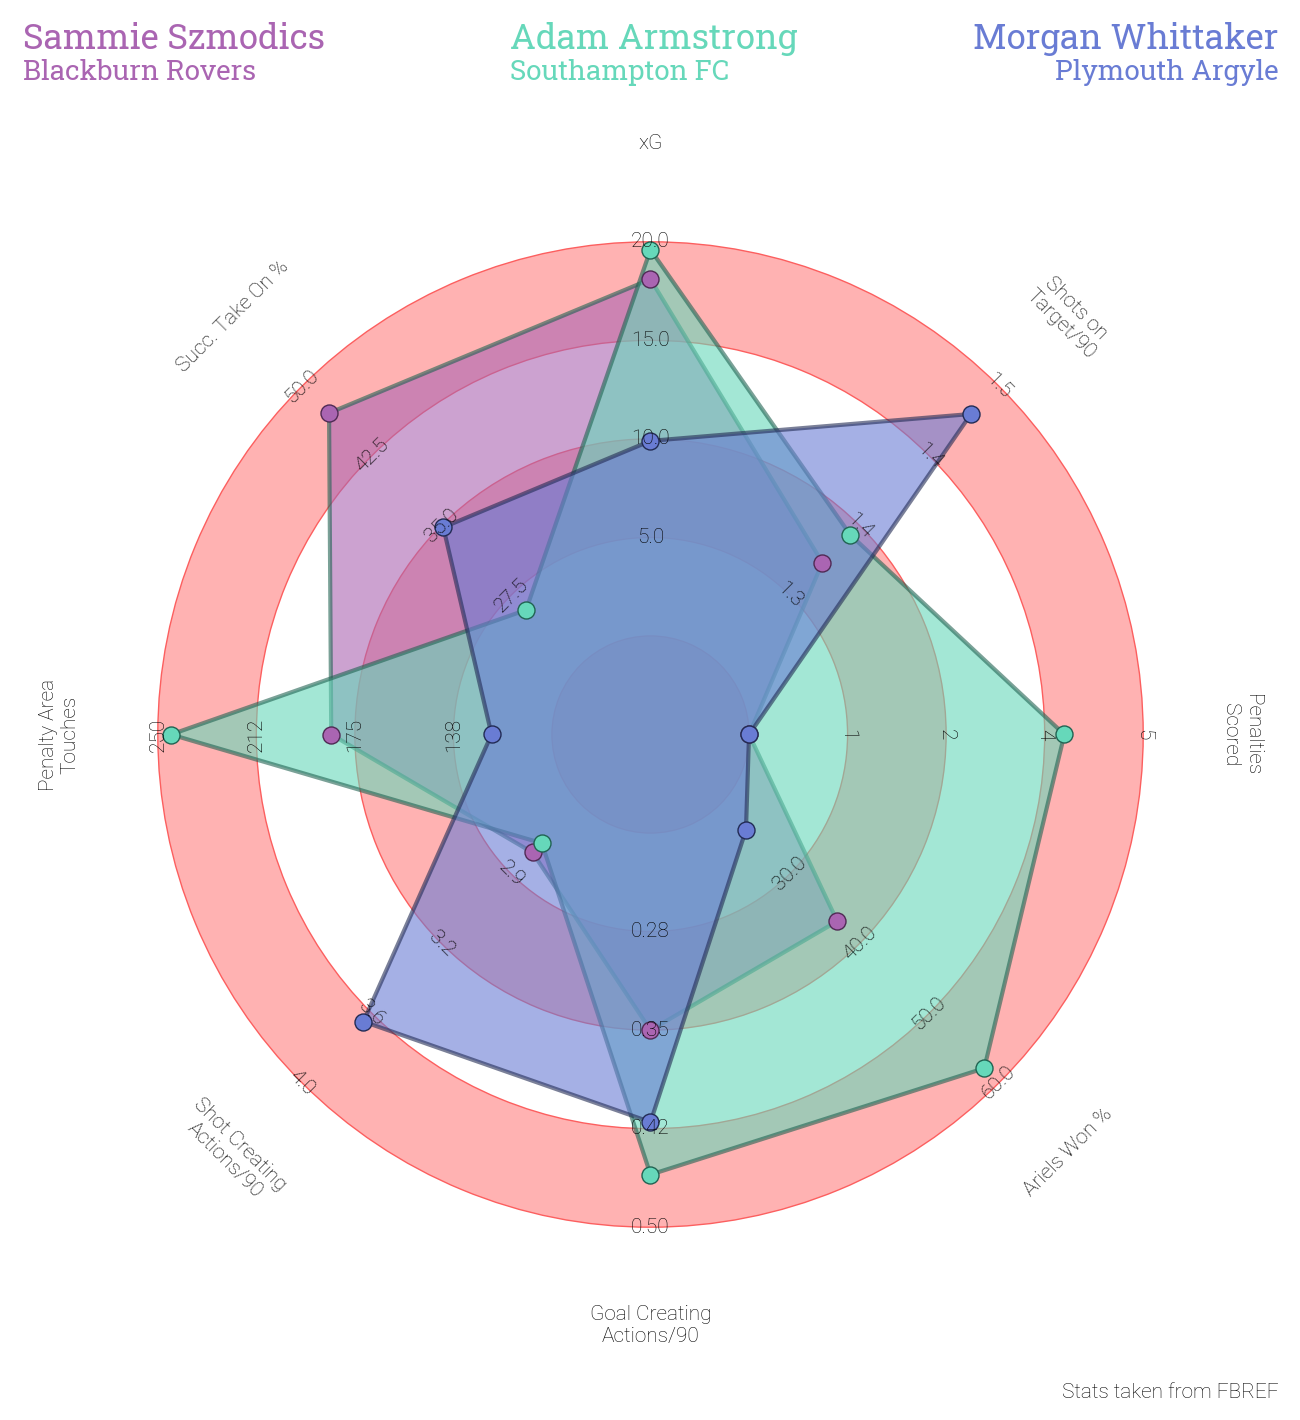

In [37]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar1, vertices1 = radar.draw_radar_solid(szmodics, ax=axs['radar'],
                                           kwargs={'facecolor': '#aa65b2',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(armstrong, ax=axs['radar'],
                                           kwargs={'facecolor': '#66d8ba',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar3, vertices3 = radar.draw_radar_solid(whittaker, ax=axs['radar'],
                                           kwargs={'facecolor': '#697cd4',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})

axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
           c='#aa65b2', edgecolors='#502a54', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
           c='#66d8ba', edgecolors='#216352', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices3[:, 0], vertices3[:, 1],
           c='#697cd4', edgecolors='#222b54', marker='o', s=150, zorder=2)

range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15, fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15, fontproperties=robotto_thin.prop)


# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Stats taken from FBREF', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Sammie Szmodics', fontsize=25, color='#aa65b2',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Blackburn Rovers', fontsize=20,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#aa65b2')
title1_text = axs['title'].text(0.39, 0.65, 'Adam Armstrong', fontsize=25, color='#66d8ba',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.39, 0.25, 'Southampton FC', fontsize=20,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#66d8ba')
title3_text = axs['title'].text(0.99, 0.65, 'Morgan Whittaker', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#697cd4')
title4_text = axs['title'].text(0.99, 0.25, 'Plymouth Argyle', fontsize=20,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#697cd4')

## Championship top assisters radar plot

Collecting all the data first again

In [38]:
import pandas as pd
import requests
import warnings
warnings.filterwarnings("ignore")

url= 'https://fbref.com/en/comps/10/shooting/Championship-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

goals = df[['Player', 'npxG']]
goals['npxG'] = pd.to_numeric(goals['npxG'], errors='coerce')
goals = goals[goals['Player'] != "Player"]


# pass stats

url= 'https://fbref.com/en/comps/10/passing/Championship-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

passes = df[['Player', 'KP', 'xA', 'PrgP', 'Ast']]
passes['KP'] = pd.to_numeric(passes['KP'], errors='coerce')
passes['xA'] = pd.to_numeric(passes['xA'], errors='coerce')
passes['PrgP'] = pd.to_numeric(passes['PrgP'], errors='coerce')
passes['Ast'] = pd.to_numeric(passes['Ast'], errors='coerce')
passes = passes[passes['Player'] != "Player"]

# standard stats

url= 'https://fbref.com/en/comps/10/stats/Championship-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

standard = df[['Player', 'G-PK']]
standard['G-PK'] = pd.to_numeric(standard['G-PK'], errors='coerce')
standard = standard[standard['Player'] != "Player"]

# gca stats

url= 'https://fbref.com/en/comps/10/gca/Championship-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)
gca = df[['Player', 'GCA90', 'SCA90']]

gca['GCA90'] = pd.to_numeric(gca['GCA90'], errors='coerce')
gca['SCA90'] = pd.to_numeric(gca['SCA90'], errors='coerce')
gca = gca[gca['Player'] != "Player"]

# pass type stats

url= 'https://fbref.com/en/comps/10/passing_types/Championship-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)

pass_type = df[['Player', 'TB']]
pass_type['TB'] = pd.to_numeric(pass_type['TB'], errors='coerce')
pass_type = pass_type[pass_type['Player'] != "Player"]

# possession stats

url= 'https://fbref.com/en/comps/10/possession/Championship-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

df = df.reset_index(drop=True)
# creating a list with new names
new_columns = []
for col in df.columns:
  if 'level_0' in col:
      new_col = col.split()[-1]  # takes the last name
  else:
      new_col = col
  new_columns.append(new_col)

# rename columns
df.columns = new_columns
df = df.fillna(0)
possession = df[['Player', 'Att Pen', 'Succ%', 'Mis']]

possession['Att Pen'] = pd.to_numeric(possession['Att Pen'], errors='coerce')
possession['Succ%'] = pd.to_numeric(possession['Succ%'], errors='coerce')
possession['Mis'] = pd.to_numeric(possession['Mis'], errors='coerce')
possession = possession[possession['Player'] != "Player"]

In [39]:
df_merged = pd.concat([goals, passes, standard, pass_type, gca, possession], axis=1)

top_assisters = df_merged.nlargest(3, 'Ast')
top_assisters = top_assisters.reset_index(drop=True)

top_assisters_data = top_assisters.loc[:,~top_assisters.columns.duplicated()].copy()
top_assisters_data

,Player,npxG,KP,xA,PrgP,Ast,G-PK,TB,GCA90,SCA90,Att Pen,Succ%,Mis
0,Leif Davis,1.9,106.0,8.9,127.0,16.0,2.0,1.0,0.66,4.87,72.0,35.3,63.0
1,Georginio Rutter,11.8,79.0,10.1,156.0,16.0,6.0,26.0,0.77,4.43,210.0,45.2,166.0
2,Kiernan Dewsbury-Hall,8.9,97.0,11.4,238.0,13.0,10.0,18.0,0.82,5.04,144.0,56.7,85.0


In [40]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

# parameter names of the statistics we want to show
params = ["npxG", "Key Passes", "xA", "Progressive Passes", "Non-Penalty Goals", "Through Balls", "Goal Creating Actions/90", "Shot Creating Actions/90", "Penalty Area Touches", "Succ. Take On %", "Miscontrols"]

# The lower and upper boundaries for the statistics
low =  [0, 70, 8, 120, 0, 0, 0.6, 4.4, 70, 30, 60]
high = [12, 110, 12, 240, 10, 30, 0.85, 5.1, 210, 60, 170]


radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False, True, False, True, True, True, False, False, True, False, True],
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [41]:
davis = top_assisters_data.loc[0]
rutter = top_assisters_data.loc[1]
dews_hall = top_assisters_data.loc[2]


davis = [davis['npxG'], davis['KP'], davis['xA'], davis['PrgP'], davis['G-PK'], davis['TB'], davis['GCA90'], davis['SCA90'], davis['Att Pen'], davis['Succ%'], davis['Mis']]
rutter = [rutter['npxG'], rutter['KP'], rutter['xA'], rutter['PrgP'], rutter['G-PK'], rutter['TB'], rutter['GCA90'], rutter['SCA90'], rutter['Att Pen'], rutter['Succ%'], rutter['Mis']]
dews_hall = [dews_hall['npxG'], dews_hall['KP'], dews_hall['xA'], dews_hall['PrgP'], dews_hall['G-PK'], dews_hall['TB'], dews_hall['GCA90'], dews_hall['SCA90'], dews_hall['Att Pen'], dews_hall['Succ%'], dews_hall['Mis']]

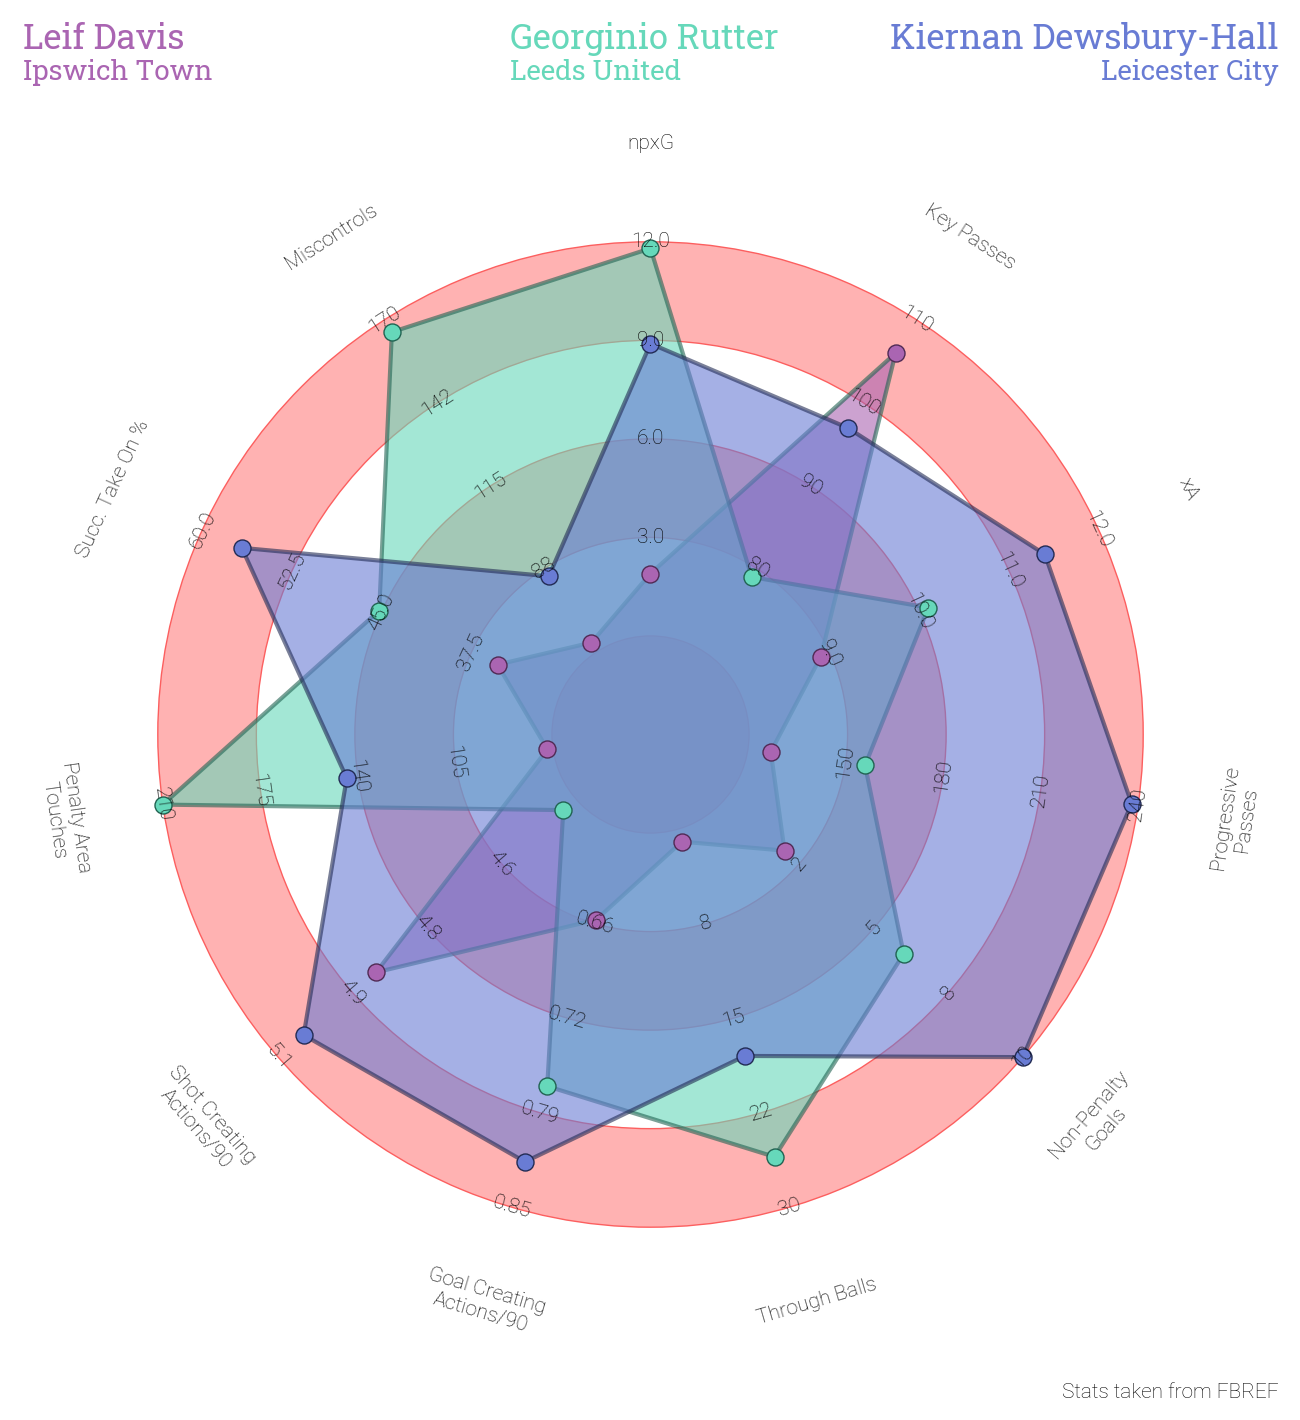

In [42]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar1, vertices1 = radar.draw_radar_solid(davis, ax=axs['radar'],
                                           kwargs={'facecolor': '#aa65b2',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(rutter, ax=axs['radar'],
                                           kwargs={'facecolor': '#66d8ba',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar3, vertices3 = radar.draw_radar_solid(dews_hall, ax=axs['radar'],
                                           kwargs={'facecolor': '#697cd4',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})

axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
           c='#aa65b2', edgecolors='#502a54', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
           c='#66d8ba', edgecolors='#216352', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices3[:, 0], vertices3[:, 1],
           c='#697cd4', edgecolors='#222b54', marker='o', s=150, zorder=2)

range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15, fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15, fontproperties=robotto_thin.prop)


# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Stats taken from FBREF', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Leif Davis', fontsize=25, color='#aa65b2',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Ipswich Town', fontsize=20,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#aa65b2')
title1_text = axs['title'].text(0.39, 0.65, 'Georginio Rutter', fontsize=25, color='#66d8ba',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.39, 0.25, 'Leeds United', fontsize=20,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#66d8ba')
title3_text = axs['title'].text(0.99, 0.65, 'Kiernan Dewsbury-Hall', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#697cd4')
title4_text = axs['title'].text(0.99, 0.25, 'Leicester City', fontsize=20,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#697cd4')